In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [90]:
sb.set_style("darkgrid")
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize']=(14,7)
plt.rcParams['figure.facecolor'] = '#FFF'

In [91]:
data = pd.read_csv("car_prediction.csv")

In [92]:
data.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.470,21.9,55,4800,45,50,7099.0
180,181,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,...,171,mpfi,3.27,3.350,9.2,156,5200,20,24,15690.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.070,9.3,110,5250,21,28,15040.0
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.860,7.0,145,5000,19,24,12629.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.640,21.5,123,4350,22,25,28248.0
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.640,8.7,73,4400,26,31,7603.0
93,94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.290,9.4,69,5200,31,37,7349.0
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,10295.0
58,59,3,mazda glc 4,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

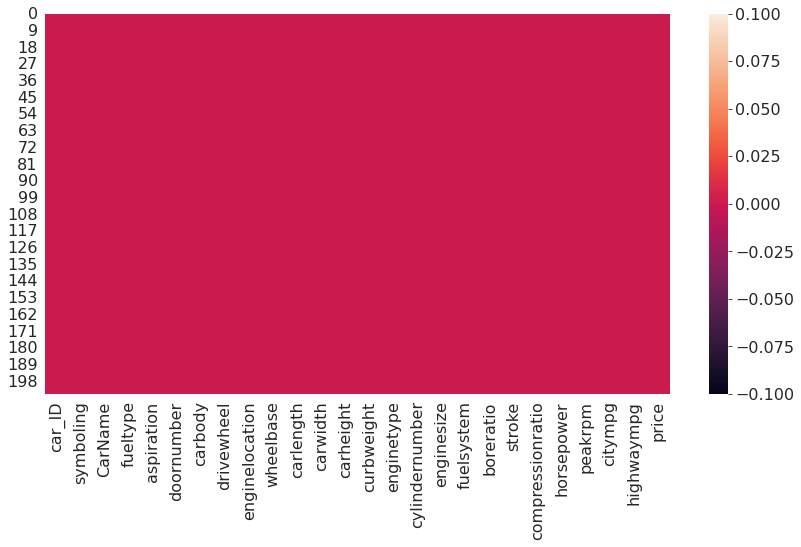

In [94]:
sb.heatmap(data.isnull())

In [95]:
data.shape

(205, 26)

In [96]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

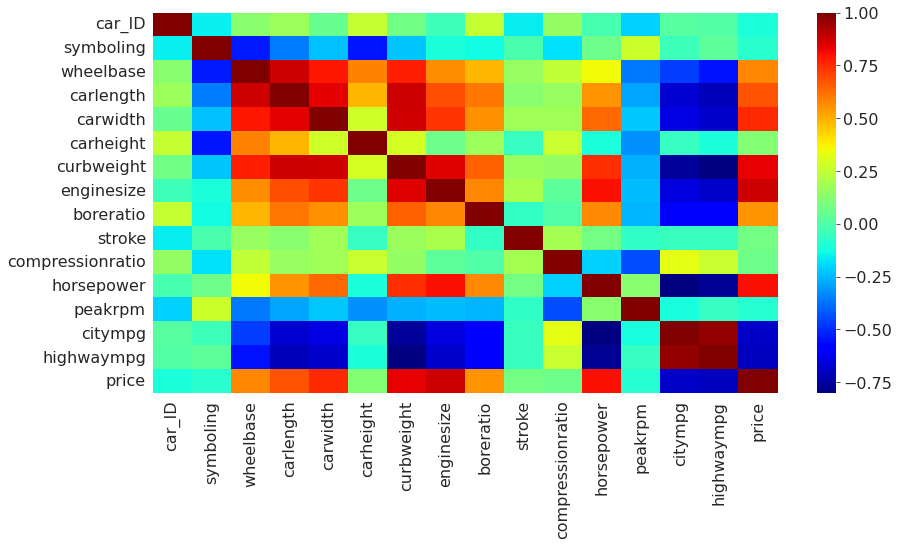

In [97]:
sb.heatmap(data.corr(),cmap="jet")

In [98]:
data.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

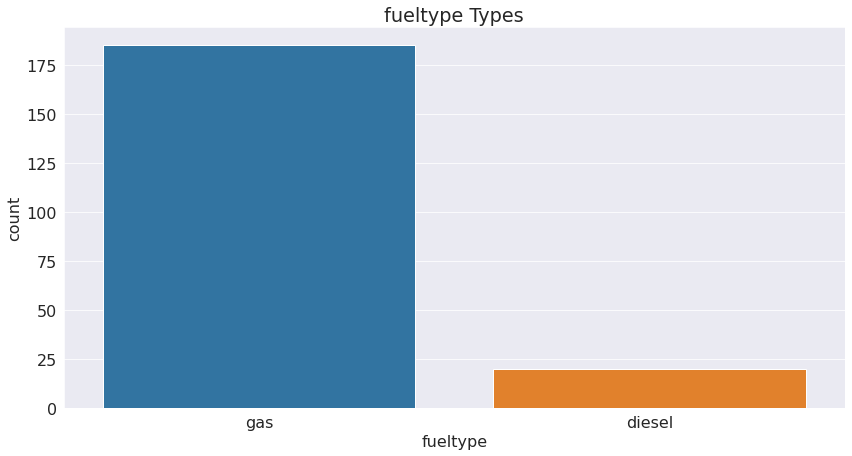

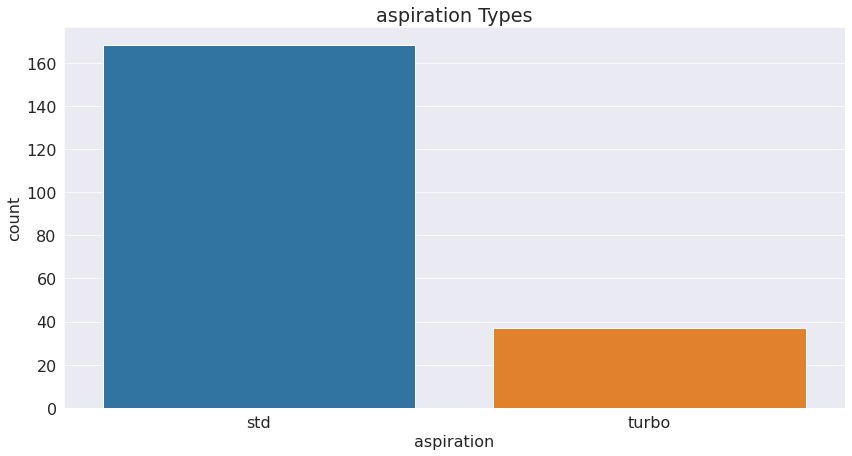

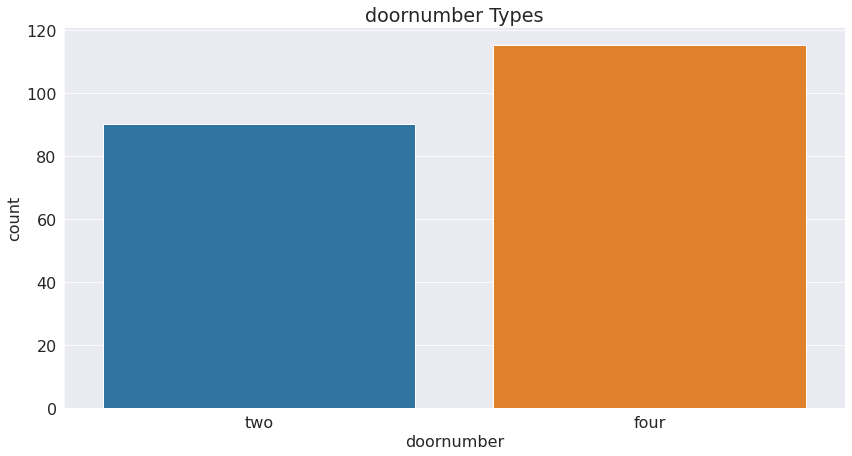

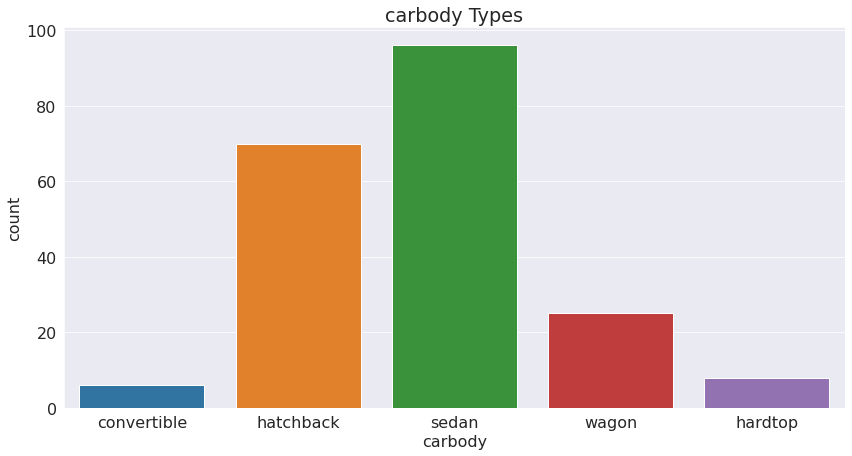

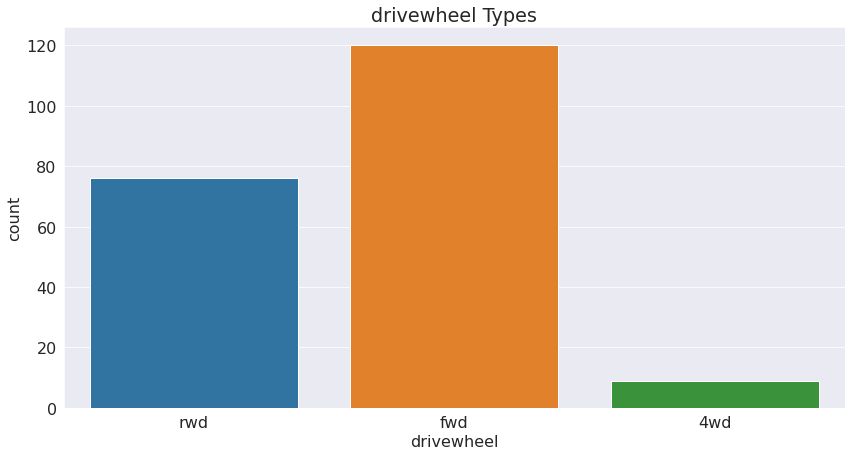

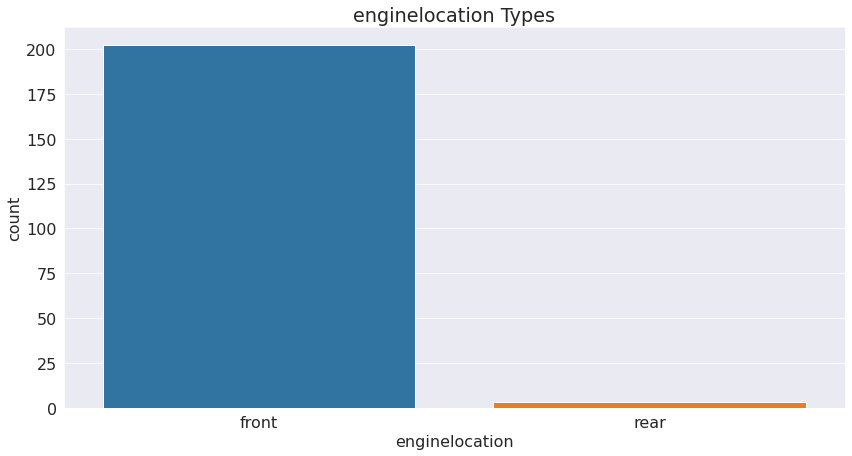

In [99]:
for index,col in enumerate("fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation".split(','),start=1):
    sb.countplot(x=col,data=data)
    plt.title(f"{col} Types")
    print('\n\n')
    plt.show()

In [100]:
fig = px.histogram(data,x='horsepower',color="fueltype",marginal='box',color_discrete_sequence=['blue',"red"],nbins=30,title="House Power- Fuel Type")
fig.update_layout(bargap=0.2)

### Assignment

1. Plot a histogram for `enginesize` with box plot as marginal. Explore the data as much as you can
2. Understand `carwidth` and `carheight` with scatter plot
3. Find the suitable graphical representation for `peakrpm`. 

<AxesSubplot:xlabel='stroke', ylabel='Count'>

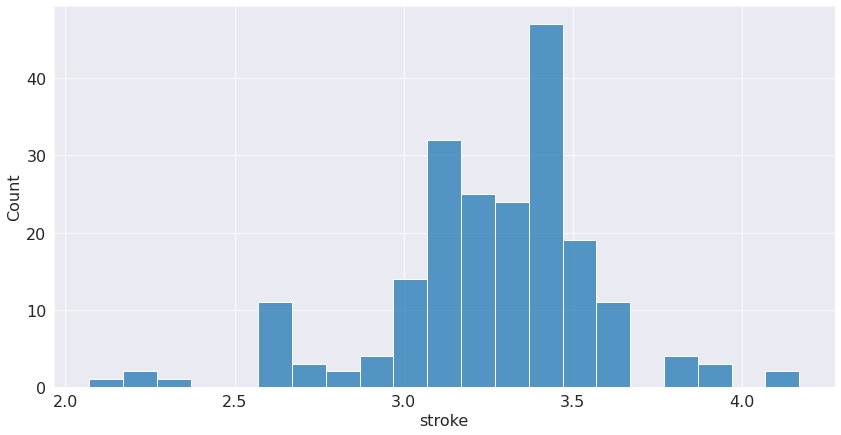

In [101]:
sb.histplot(data=data,x="stroke")

In [102]:
numerical = list()
category = list()

minmax = MinMaxScaler()
lblenc = LabelEncoder()

In [103]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Feature Selection

In [104]:
features = ['CarName','horsepower','enginesize','peakrpm','highwaympg','doornumber','carlength']

In [105]:
X = data[features]
Y = data.price

In [106]:
for col in X:
    if X[col].dtype == "O":
        category.append(col)
    else:
        numerical.append(col)

In [107]:
numerical

['horsepower', 'enginesize', 'peakrpm', 'highwaympg', 'carlength']

In [108]:
X[numerical] = minmax.fit_transform(X[numerical])

In [109]:
for cat_col in category:
    X[cat_col] = lblenc.fit_transform(X[cat_col])

In [110]:
X

,CarName,horsepower,enginesize,peakrpm,highwaympg,doornumber,carlength
0,2,0.262500,0.260377,0.346939,0.289474,1,0.413433
1,3,0.262500,0.260377,0.346939,0.289474,1,0.413433
2,1,0.441667,0.343396,0.346939,0.263158,1,0.449254
3,4,0.225000,0.181132,0.551020,0.368421,0,0.529851
4,5,0.279167,0.283019,0.551020,0.157895,0,0.529851
...,...,...,...,...,...,...,...
200,139,0.275000,0.301887,0.510204,0.315789,0,0.711940
201,138,0.466667,0.301887,0.469388,0.236842,0,0.711940
202,140,0.358333,0.422642,0.551020,0.184211,0,0.711940
203,142,0.241667,0.316981,0.265306,0.289474,0,0.711940


In [111]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [112]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.23)

In [113]:
x_train.shape

(157, 7)

In [115]:
x_test.shape

(48, 7)

In [116]:
y_train.shape

(157,)

In [117]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [118]:
car_predict = model.predict(x_test)

In [120]:
model.score(x_train,y_train) * 100

84.36913772026185

In [122]:
model.score(x_test,y_test) *100

77.10004688986868

In [123]:
abs_error = mean_absolute_error(y_test,car_predict)

In [124]:
abs_error

2927.127837373467

In [131]:
mse = mean_squared_error(y_test,car_predict,squared=False)

In [132]:
mse

4082.525782572327

In [135]:
x_test[:10]

,CarName,horsepower,enginesize,peakrpm,highwaympg,doornumber,carlength
100,79,0.204167,0.222642,0.428571,0.473684,0,0.482090
195,138,0.275000,0.301887,0.510204,0.315789,0,0.711940
149,107,0.262500,0.177358,0.265306,0.184211,0,0.485075
140,107,0.104167,0.177358,0.102041,0.394737,1,0.241791
86,69,0.166667,0.230189,0.346939,0.421053,0,0.467164
200,139,0.275000,0.301887,0.510204,0.315789,0,0.711940
179,120,0.470833,0.415094,0.428571,0.210526,1,0.632836
127,97,0.662500,0.501887,0.714286,0.236842,1,0.414925
96,76,0.087500,0.135849,0.428571,0.552632,0,0.361194
36,42,0.116667,0.116981,0.755102,0.473684,0,0.238806


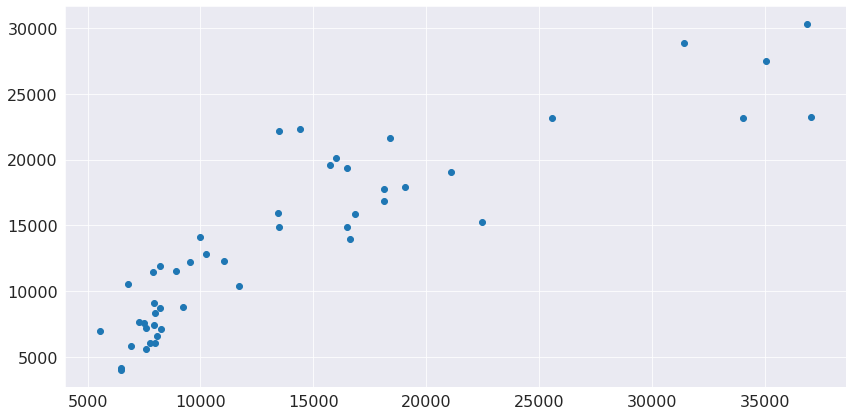

In [141]:
plt.scatter(y_test,car_predict)